# Executive summary

Summary of this notebook

ES TBD

# Setup

In [17]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import unicodedata
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

# Manipulation

In [16]:
# Data frame from web scraping
df = pd.read_pickle('result_mod.pkl')

In [48]:
df.sample(5)

,State,Overall_score,Quality_rank,Safety_rank,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,log_percent_SMI,log_incarceration,log_salary,log_budget,log_income
14,Kansas,56.24,23,16,47984,53906,9972,760,4.4,13.5,62.66,49,1.481605,6.633318,10.778623,9.207536,10.894997
27,California,51.45,39,13,78711,64500,9595,750,4.3,16.4,56.14,47,1.458615,6.620073,11.273538,9.168997,11.074421
9,Maine,59.93,16,4,51077,51494,12706,350,4.7,14.0,62.20,45,1.547563,5.857933,10.841090,9.449830,10.849221
12,NorthCarolina,57.68,27,6,49837,47830,8512,730,4.3,17.2,44.45,42,1.458615,6.593045,10.816513,9.049232,10.775408
32,SouthCarolina,48.58,40,22,48598,47238,9732,880,4.1,17.9,45.01,39,1.410987,6.779922,10.791338,9.183175,10.762954


In [9]:
df['log_log_salary']=np.log(df.log_salary)

In [10]:
df.corr()

,Overall_score,Quality_rank,Safety_rank,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,log_percent_SMI,log_incarceration,log_salary,log_budget,log_income,log_log_salary
Overall_score,1.000000,-0.870543,-0.798956,0.397292,0.559595,0.379418,-0.627074,-0.131972,-0.718104,0.672950,0.704728,-0.120643,-0.619010,0.408091,0.390309,0.586579,0.408969
Quality_rank,-0.870543,1.000000,0.488974,-0.361223,-0.498897,-0.465702,0.616553,-0.027035,0.676407,-0.642890,-0.662595,-0.034926,0.610636,-0.379961,-0.487839,-0.515545,-0.381569
Safety_rank,-0.798956,0.488974,1.000000,-0.202369,-0.405059,-0.138569,0.442733,0.209957,0.539715,-0.504480,-0.484275,0.192594,0.447747,-0.214440,-0.153783,-0.440118,-0.215541
Salary,0.397292,-0.361223,-0.202369,1.000000,0.648897,0.758127,-0.454299,-0.177429,-0.412568,0.310051,0.397297,-0.181829,-0.441029,0.996260,0.741649,0.650667,0.995550
Income,0.559595,-0.498897,-0.405059,0.648897,1.000000,0.602636,-0.551058,-0.365149,-0.851151,0.594387,0.691589,-0.385579,-0.528633,0.657461,0.590733,0.996464,0.657925
Budget,0.379418,-0.465702,-0.138569,0.758127,0.602636,1.000000,-0.517864,-0.214484,-0.510921,0.336213,0.364298,-0.225807,-0.531544,0.761666,0.987415,0.592591,0.761618
Number_of_incarceration,-0.627074,0.616553,0.442733,-0.454299,-0.551058,-0.517864,1.000000,-0.058711,0.692920,-0.771355,-0.746797,-0.040202,0.980900,-0.465845,-0.532297,-0.566055,-0.466733
Percent_SMI,-0.131972,-0.027035,0.209957,-0.177429,-0.365149,-0.214484,-0.058711,1.000000,0.199595,-0.084646,-0.062378,0.993603,-0.061865,-0.170402,-0.225947,-0.359468,-0.169637
Percent_poverty,-0.718104,0.676407,0.539715,-0.412568,-0.851151,-0.510921,0.692920,0.199595,1.000000,-0.751678,-0.834091,0.215854,0.661258,-0.434811,-0.513524,-0.864656,-0.436592
Overall_score_H,0.672950,-0.642890,-0.504480,0.310051,0.594387,0.336213,-0.771355,-0.084646,-0.751678,1.000000,0.792286,-0.105507,-0.751174,0.321140,0.365304,0.619221,0.321960


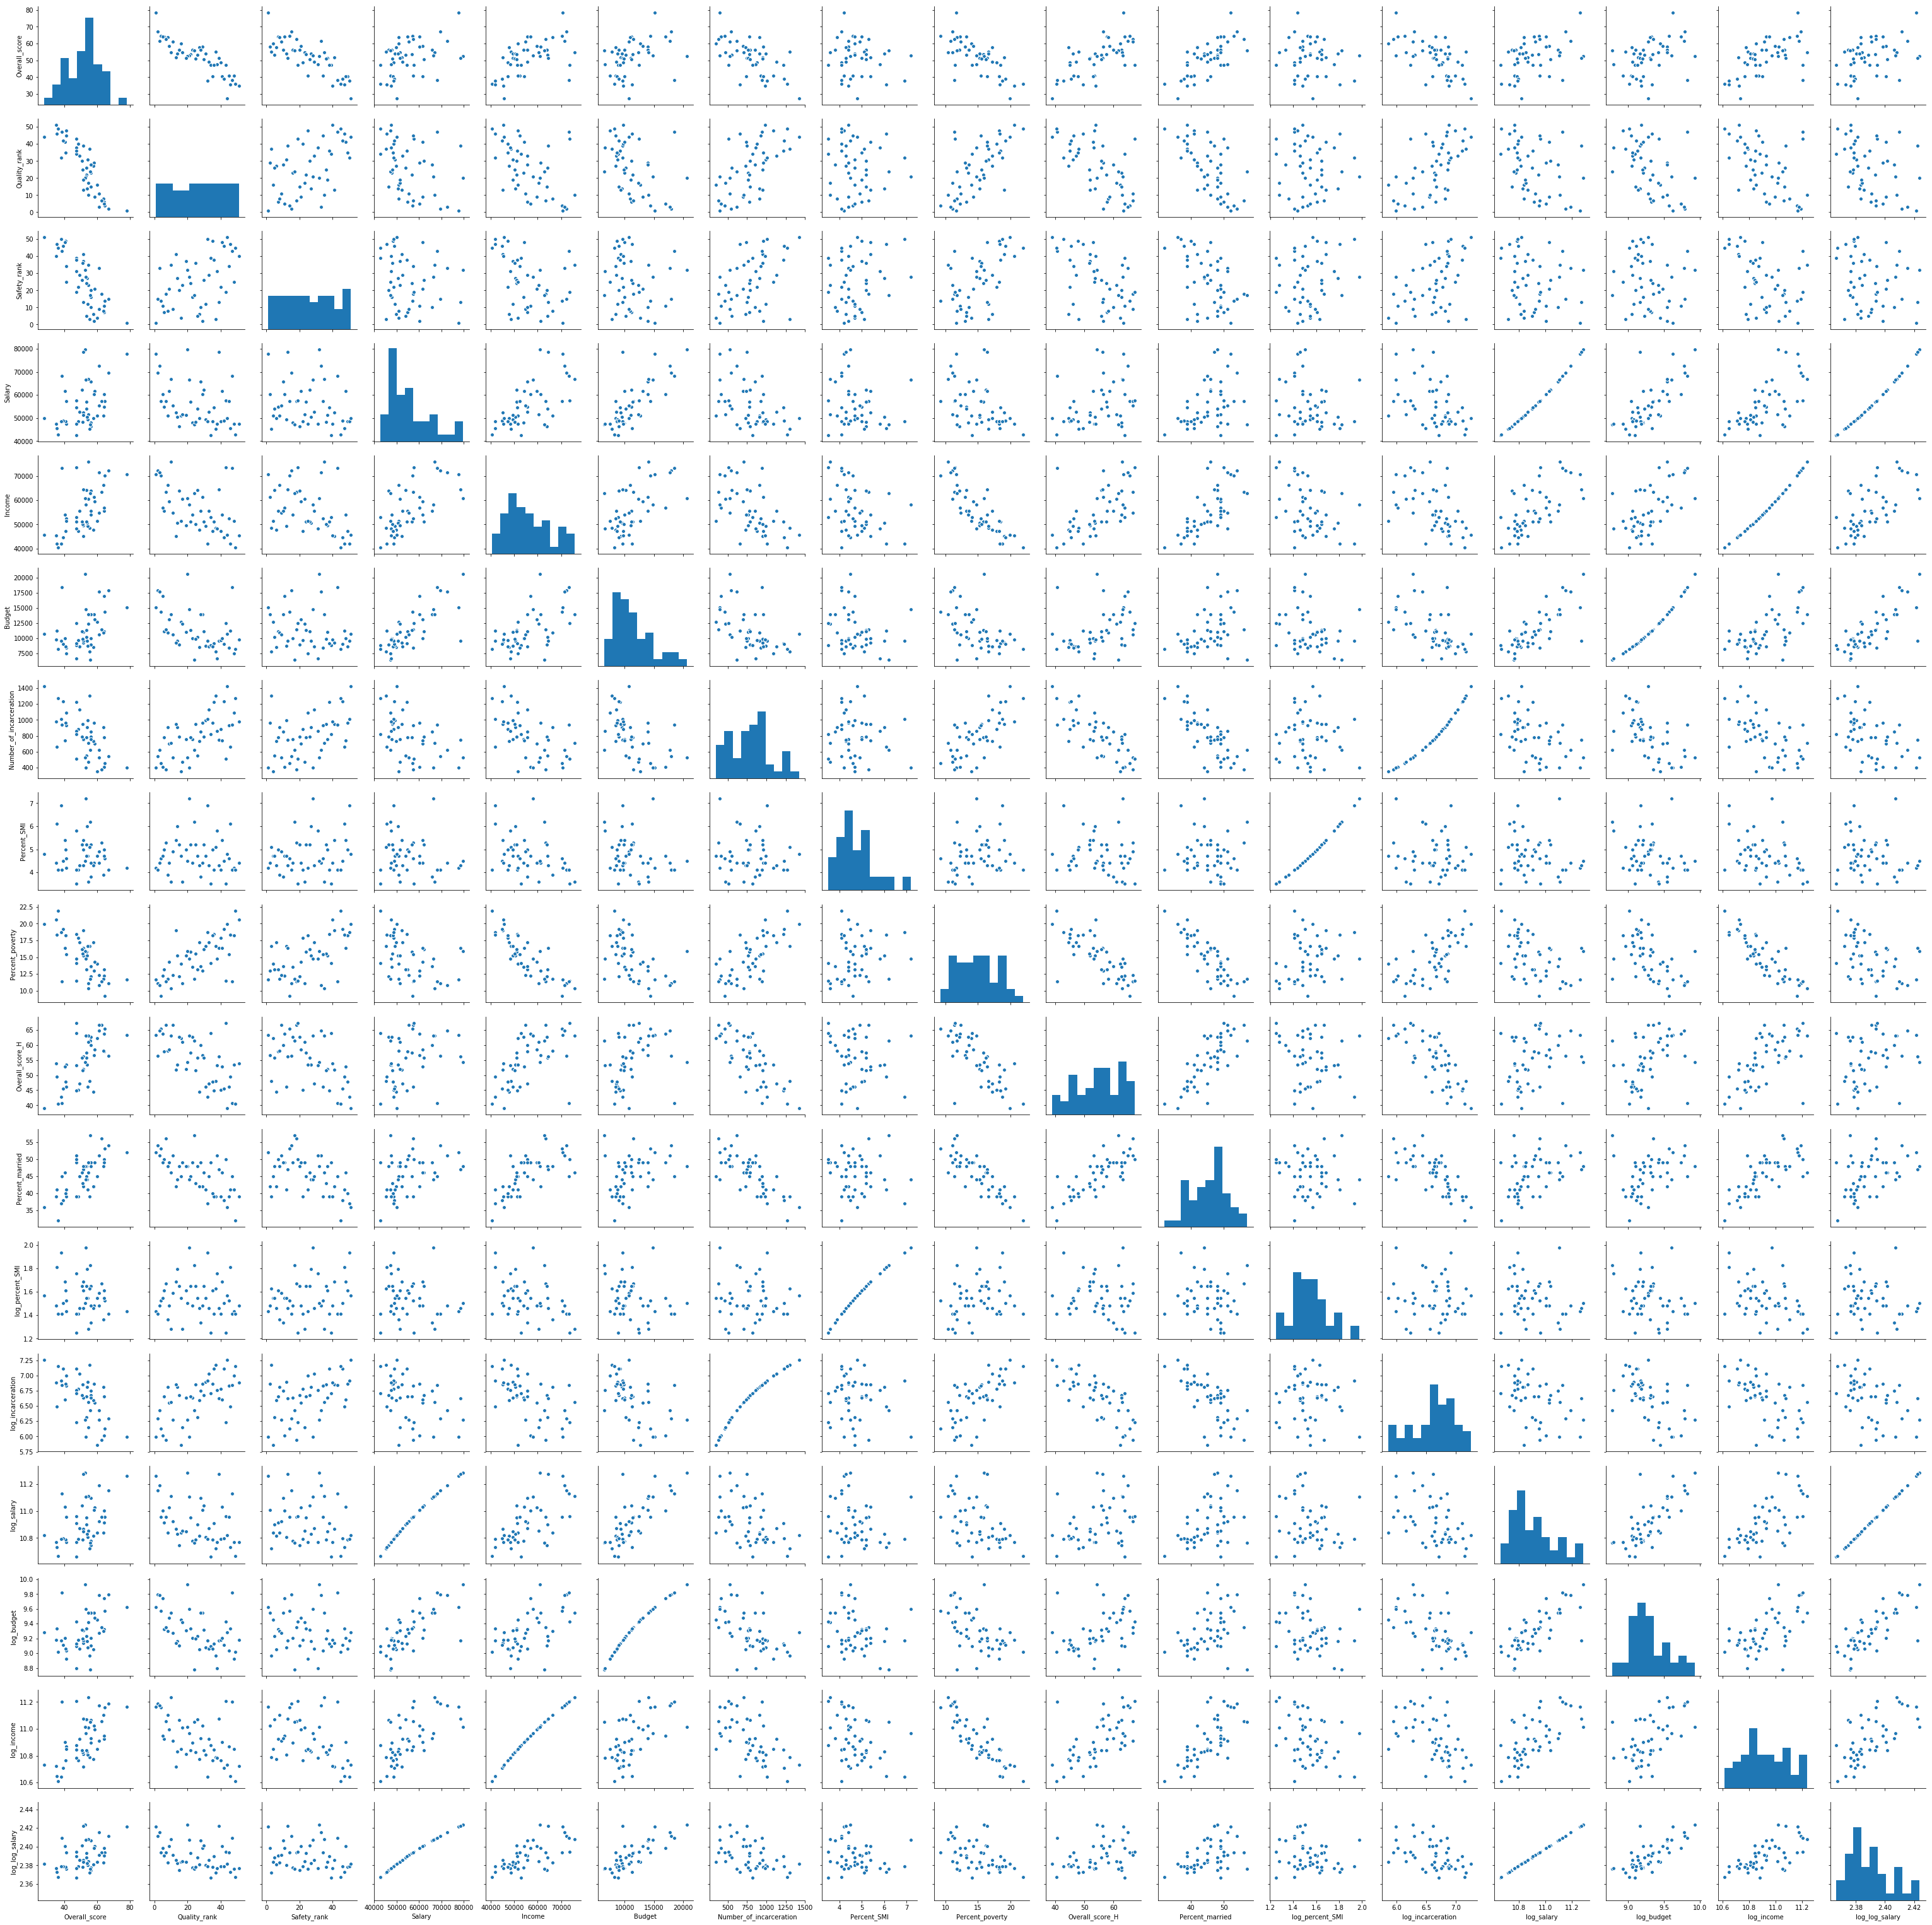

In [11]:
sns.pairplot(df)

Break up the Overall_score, Quality_rank, Safety_rank. They are related to each other and quite correlated

In [19]:
df_overall_score = df.drop(['Quality_rank','Safety_rank'],1)
df_overall_score = df_overall_score.set_index('State')

In [20]:
df_quality_rank = df.drop(['Overall_score','Safety_rank'],1)
df_quality_rank = df_quality_rank.set_index('State')

In [22]:
df_safety_rank = df.drop(['Quality_rank','Overall_score'],1)
df_safety_rank = df_safety_rank.set_index('State')

In [63]:
# test poly interactions and relationships with overall score

p = PolynomialFeatures(degree=2).fit(df_overall_score.drop('Overall_score',1))
features = pd.DataFrame(p.transform(df_overall_score.drop('Overall_score',1)), index = df_overall_score.index, columns=p.get_feature_names(df_overall_score.drop('Overall_score',1).columns))
features = features.reset_index(level=0)
features.rename(columns = {'index' : 'State'}, inplace = True)
features

,State,1,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,...,log_incarceration^2,log_incarceration log_salary,log_incarceration log_budget,log_incarceration log_income,log_salary^2,log_salary log_budget,log_salary log_income,log_budget^2,log_budget log_income,log_income^2
0,Massachusetts,1.0,77804.0,70628.0,15086.0,400.0,4.2,11.7,63.36,52.0,...,35.897647,67.475563,57.647011,66.895792,126.831476,108.357087,125.741700,92.573694,107.426049,124.661288
1,NewJersey,1.0,69623.0,72222.0,17906.0,540.0,4.1,11.1,56.43,54.0,...,39.583842,70.156345,61.612652,70.386930,124.341461,109.199063,124.750137,95.900717,109.557969,125.160156
2,NewHampshire,1.0,57253.0,70303.0,14334.0,460.0,4.6,9.2,65.54,53.0,...,37.591938,67.169029,58.678226,68.427981,120.017181,104.845870,122.266668,91.592357,106.811001,124.558317
3,Wisconsin,1.0,54998.0,55638.0,11187.0,780.0,5.0,13.2,57.80,50.0,...,44.346196,72.686540,62.081319,72.763585,119.138362,101.755657,119.264645,86.909149,101.863515,119.391062
4,Vermont,1.0,60187.0,56990.0,16988.0,410.0,4.7,12.2,63.87,49.0,...,36.194147,66.209083,58.598950,65.880718,121.114684,107.193650,120.514013,94.872713,106.662021,119.916321
5,Virginia,1.0,51049.0,66262.0,10972.0,910.0,3.9,11.8,58.18,48.0,...,46.423027,73.861427,63.386169,75.638582,117.517334,100.850659,120.344879,86.547704,103.277193,123.240457
6,Minnesota,1.0,57346.0,63488.0,11463.0,380.0,5.3,11.4,66.62,56.0,...,35.285635,65.085615,55.522066,65.690015,120.052745,102.412437,121.167582,87.364161,103.363462,122.292771
7,Connecticut,1.0,72561.0,71346.0,17745.0,620.0,4.4,10.8,64.84,51.0,...,41.341293,71.962596,62.907469,71.854022,125.264957,109.502740,125.075963,95.723898,109.337527,124.887253
8,Iowa,1.0,55443.0,54736.0,10669.0,530.0,4.9,12.3,66.62,51.0,...,39.348986,68.519330,58.181547,68.438825,119.314348,101.312918,119.174163,86.027436,101.193883,119.034142
9,Maine,1.0,51077.0,51494.0,12706.0,350.0,4.7,14.0,62.20,45.0,...,34.315381,63.506378,55.356470,63.554009,117.529223,102.446449,117.617372,89.299280,102.523286,117.705587


In [64]:
features = pd.merge(features,df[['Overall_score','State']],on='State')
features

,State,1,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,...,log_incarceration log_salary,log_incarceration log_budget,log_incarceration log_income,log_salary^2,log_salary log_budget,log_salary log_income,log_budget^2,log_budget log_income,log_income^2,Overall_score
0,Massachusetts,1.0,77804.0,70628.0,15086.0,400.0,4.2,11.7,63.36,52.0,...,67.475563,57.647011,66.895792,126.831476,108.357087,125.741700,92.573694,107.426049,124.661288,78.16
1,NewJersey,1.0,69623.0,72222.0,17906.0,540.0,4.1,11.1,56.43,54.0,...,70.156345,61.612652,70.386930,124.341461,109.199063,124.750137,95.900717,109.557969,125.160156,66.92
2,NewHampshire,1.0,57253.0,70303.0,14334.0,460.0,4.6,9.2,65.54,53.0,...,67.169029,58.678226,68.427981,120.017181,104.845870,122.266668,91.592357,106.811001,124.558317,64.65
3,Wisconsin,1.0,54998.0,55638.0,11187.0,780.0,5.0,13.2,57.80,50.0,...,72.686540,62.081319,72.763585,119.138362,101.755657,119.264645,86.909149,101.863515,119.391062,64.25
4,Vermont,1.0,60187.0,56990.0,16988.0,410.0,4.7,12.2,63.87,49.0,...,66.209083,58.598950,65.880718,121.114684,107.193650,120.514013,94.872713,106.662021,119.916321,64.09
5,Virginia,1.0,51049.0,66262.0,10972.0,910.0,3.9,11.8,58.18,48.0,...,73.861427,63.386169,75.638582,117.517334,100.850659,120.344879,86.547704,103.277193,123.240457,63.77
6,Minnesota,1.0,57346.0,63488.0,11463.0,380.0,5.3,11.4,66.62,56.0,...,65.085615,55.522066,65.690015,120.052745,102.412437,121.167582,87.364161,103.363462,122.292771,62.68
7,Connecticut,1.0,72561.0,71346.0,17745.0,620.0,4.4,10.8,64.84,51.0,...,71.962596,62.907469,71.854022,125.264957,109.502740,125.075963,95.723898,109.337527,124.887253,61.31
8,Iowa,1.0,55443.0,54736.0,10669.0,530.0,4.9,12.3,66.62,51.0,...,68.519330,58.181547,68.438825,119.314348,101.312918,119.174163,86.027436,101.193883,119.034142,61.06
9,Maine,1.0,51077.0,51494.0,12706.0,350.0,4.7,14.0,62.20,45.0,...,63.506378,55.356470,63.554009,117.529223,102.446449,117.617372,89.299280,102.523286,117.705587,59.93


In [61]:
features.corr()

,1,Salary,Income,Budget,Number_of_incarceration,Percent_SMI,Percent_poverty,Overall_score_H,Percent_married,log_percent_SMI,...,log_incarceration log_salary,log_incarceration log_budget,log_incarceration log_income,log_salary^2,log_salary log_budget,log_salary log_income,log_budget^2,log_budget log_income,log_income^2,Overall_score
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,NaN,1.000000,0.648897,0.758127,-0.454299,-0.177429,-0.412568,0.310051,0.397297,-0.181829,...,-0.186233,-0.056962,-0.292090,0.996908,0.878937,0.902455,0.744403,0.789105,0.650702,0.397292
Income,NaN,0.648897,1.000000,0.602636,-0.551058,-0.365149,-0.851151,0.594387,0.691589,-0.385579,...,-0.382104,-0.251407,-0.280181,0.656945,0.651095,0.909319,0.593336,0.811461,0.997089,0.559595
Budget,NaN,0.758127,0.602636,1.000000,-0.517864,-0.214484,-0.510921,0.336213,0.364298,-0.225807,...,-0.356453,-0.010640,-0.413436,0.761654,0.967621,0.743294,0.990005,0.946245,0.593717,0.379418
Number_of_incarceration,NaN,-0.454299,-0.551058,-0.517864,1.000000,-0.058711,0.692920,-0.771355,-0.746797,-0.040202,...,0.936923,0.831007,0.931478,-0.464928,-0.539444,-0.565461,-0.531970,-0.601162,-0.564895,-0.627074
Percent_SMI,NaN,-0.177429,-0.365149,-0.214484,-0.058711,1.000000,0.199595,-0.084646,-0.062378,0.993603,...,-0.120243,-0.217171,-0.185359,-0.171147,-0.219555,-0.292935,-0.224715,-0.303785,-0.360015,-0.131972
Percent_poverty,NaN,-0.412568,-0.851151,-0.510921,0.692920,0.199595,1.000000,-0.751678,-0.834091,0.215854,...,0.592944,0.456558,0.471176,-0.432989,-0.515864,-0.713855,-0.514748,-0.703426,-0.863650,-0.718104
Overall_score_H,NaN,0.310051,0.594387,0.336213,-0.771355,-0.084646,-0.751678,1.000000,0.792286,-0.105507,...,-0.728314,-0.662767,-0.653741,0.320288,0.370222,0.515471,0.363395,0.499329,0.617134,0.672950
Percent_married,NaN,0.397297,0.691589,0.364298,-0.746797,-0.062378,-0.834091,0.792286,1.000000,-0.065598,...,-0.643971,-0.608125,-0.562738,0.407207,0.390854,0.617239,0.350652,0.525260,0.715381,0.704728
log_percent_SMI,NaN,-0.181829,-0.385579,-0.225807,-0.040202,0.993603,0.215854,-0.105507,-0.065598,1.000000,...,-0.101420,-0.203721,-0.170624,-0.174782,-0.229666,-0.304996,-0.237179,-0.319850,-0.378356,-0.120643


# Appendix

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
result_index = result_mod.set_index('State').

In [ ]:
p = PolynomialFeatures(degree=2).fit(result_index)
print(p.get_feature_names(result_index.columns))
features = pd.DataFrame(p.transform(result_index), columns=p.get_feature_names(result_index.columns))
features

In [ ]:
features.corr()

In [ ]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Overall_score ~ Salary + Income + Number_of_incarceration + Percent_SMI + Percent_poverty+Overall_score_H + Percent_married', data=result1, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()